In [1324]:

import numpy as np         # dealing with arrays
import os                  # dealing with directories

import pandas as pd
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob

### functions

In [1325]:
# time drop
def time_drop(df):
    x=df['Time'].values[0]+7
    indexNames = df[df['Time'] <= x].index
    df.drop(indexNames , inplace=True)
    return df  

In [1326]:
#merge rowes
def merge_rowes(df):
    df.set_index(" Hand Type", inplace = True)
    df_lf_sync = df.loc[["left"]].reset_index()
    df_rg_sync = df.loc[["right"]].reset_index()
    df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')
    return df_sync

In [1327]:
# drop worng num of hands
def drop_hands(df,x):
    indexNames = df[df[' # hands'] == x].index
    df.drop(indexNames , inplace=True)
    return df

### sync data


In [1328]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    
      


In [1329]:
frame_sy.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044,...,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044
right,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044,...,34044,34044,34044,34044,34044,34044,34044,34044,34044,34044


In [1330]:
frame_sy=merge_rowes(frame_sy)

In [1331]:
frame_sy.columns

Index([' Hand Type_x', 'Time_x', ' Frame ID_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

### Spontan data

In [1332]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sp = pd.concat(li, axis=0, ignore_index=True)    
      

In [1333]:
frame_sp.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182,...,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182
right,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182,...,34182,34182,34182,34182,34182,34182,34182,34182,34182,34182


In [1334]:
frame_sp =merge_rowes(frame_sp)

In [1335]:
frame_sp

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,left,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,left,343.0392,129367,2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,left,343.0558,129369,2,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,left,343.0723,129371,2,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34177,left,673.4224,52505,2,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,...,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000
34178,left,673.4561,52509,2,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,...,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000
34179,left,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,...,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000
34180,left,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,...,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000


### Alone data

In [1336]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\Alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    frame_alone = pd.concat(li, axis=0, ignore_index=True)    
      

In [1337]:
 frame_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000
1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.000000,0.018766,0.000000
2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.000000,0.018409,0.000000
3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.000000,0.149852,0.000000
4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.000000,0.242324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,764.4578,59984,left,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.407660,-258.0887,-77.529710,112.970600,0.116068,1.901876,0.000000
34440,764.4913,59986,left,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.689300,-253.6847,-80.136250,109.996700,0.134497,1.952747,0.000000
34441,764.5253,59988,left,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.660750,-249.6531,-83.331760,105.004300,0.120680,1.984825,0.000000
34442,764.5587,59989,left,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.728610,-248.2768,-84.269360,103.468300,0.097735,1.988376,0.000000


In [1338]:
indexNames = frame_alone[frame_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
frame_alone.drop(indexNames , inplace=True)

In [1339]:
frame_alone=frame_alone.reset_index()


In [1340]:
frame_alone

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,...,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000
1,1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,...,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.000000,0.018766,0.000000
2,2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,...,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.000000,0.018409,0.000000
3,3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,...,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.000000,0.149852,0.000000
4,4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,...,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.000000,0.242324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,34439,764.4578,59984,left,1,-125.81370,214.8894,20.593240,20.170870,19.997410,...,0.409534,-146.63140,148.2971,44.407660,-258.0887,-77.529710,112.970600,0.116068,1.901876,0.000000
33937,34440,764.4913,59986,left,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,...,0.399021,-146.11130,148.8045,45.689300,-253.6847,-80.136250,109.996700,0.134497,1.952747,0.000000
33938,34441,764.5253,59988,left,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,...,0.379251,-144.81740,148.4588,46.660750,-249.6531,-83.331760,105.004300,0.120680,1.984825,0.000000
33939,34442,764.5587,59989,left,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,...,0.368866,-143.84820,148.1024,46.728610,-248.2768,-84.269360,103.468300,0.097735,1.988376,0.000000


### right data

In [1341]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Training\all data\right' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    df_right = pd.concat(li, axis=0, ignore_index=True)    
      

In [1342]:
indexNames =df_right[df_right[' Hand Type'] == 'left'].index
# Delete these row indexes from dataFrame
df_right.drop(indexNames , inplace=True)

In [1343]:
df_right=df_right.dropna()

In [1344]:
df_right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
3889,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
3890,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
3891,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [1345]:
df_right_copy=df_right

In [1346]:
li = []
for i in range (9):
    df = df_right_copy
    li.append(df)
    df_right_copymul = pd.concat(li, axis=0, ignore_index=True)
    

In [1347]:
 df_right_copymul

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35032,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
35033,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
35034,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
35035,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [1348]:
df_right_copymul.drop( df_right_copymul.tail(1096).index,
        inplace = True)

In [1349]:
df_right_copymul=df_right_copymul.reset_index()

In [1350]:
df_right_copymul.Time = frame_alone.Time


In [1351]:
df_right_copymul[" Frame ID"]=frame_alone[" Frame ID"]

In [1352]:
df_right_copymul

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,right,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,1,525.8351,150430,right,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,2,525.8516,150432,right,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,3,525.8682,150434,right,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,4,525.8848,150436,right,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,33936,764.4578,59984,right,1,12.21766,178.0383,-52.827330,72.118750,100.2048,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,33937,764.4913,59986,right,1,13.27968,180.4047,-51.762120,55.057170,158.7906,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,33938,764.5253,59988,right,1,14.50927,186.5876,-49.489490,79.068230,395.6981,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,33939,764.5587,59989,right,1,15.23813,190.3499,-48.043850,84.086890,434.0411,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [1353]:
df_right_copymul.set_index(" Hand Type", inplace = True)
frame_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = frame_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_copymul.loc[["right"]].reset_index()
df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [1354]:
df_sync.columns


Index([' Hand Type_x', 'index_x', 'Time_x', ' Frame ID_x', ' # hands_x',
       ' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'index_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

In [1355]:
df_sync=df_sync.drop(['index_x','index_y'], axis = 1)

In [1356]:
df_sync

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,525.8185,150428,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,left,525.8351,150430,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,left,525.8516,150432,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,left,525.8682,150434,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,left,525.8848,150436,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,left,764.4578,59984,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,left,764.4913,59986,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,left,764.5253,59988,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,left,764.5587,59989,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [1357]:
frame_sy["Type"] = 0

In [1358]:
frame_sp["Type"]=1
df_sync["Type"]=2

In [1359]:
pdList = [frame_sy,frame_sp,df_sync]  # List of dataframes
df_all = pd.concat(pdList)

In [1360]:
df_all =df_all.sort_values('Time_x')

In [1361]:
df_all=df_all.drop([' Hand Type_x', ' Hand Type_y',' Frame ID_x',' Frame ID_y'], axis = 1)

In [1362]:
df_all.reset_index()

,index,Time_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
0,28445,182.5492,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
1,28446,182.5659,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
2,28447,182.5823,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
3,28448,182.5990,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
4,28449,182.6154,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102162,34039,856.1965,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
102163,34040,856.2291,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
102164,34041,856.2631,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
102165,34042,856.2958,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [1363]:
df_all = df_all[df_all.index % 5 != 0]  # Excludes every 5rd row starting from 0

In [1364]:
df_all.columns

Index(['Time_x', ' # hands_x', ' Position X_x', ' Position Y_x',
       ' Position Z_x', ' Velocity X_x', ' Velocity Y_x', ' Velocity Z_x',
       ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x', ' Wrist Pos Y_x',
       ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x', ' Elbow Pos Z_x',
       ' Grab Strenth_x', ' Grab Angle_x', ' Pinch Strength_x', 'Time_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y', 'Type'],
      dtype='object')

### Test Data

### sync test data

In [1365]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_sy = pd.concat(li, axis=0, ignore_index=True)    
      
    

In [1366]:
test_sy.groupby(' Hand Type').count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959,...,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959
right,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959,...,9959,9959,9959,9959,9959,9959,9959,9959,9959,9959


In [1367]:
test_sy=merge_rowes(test_sy)

### spon test data

In [1368]:

path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\spon' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_spon = pd.concat(li, axis=0, ignore_index=True)    
      

In [1369]:
 test_spon=merge_rowes(test_spon)

In [1370]:
test_spon.columns

Index([' Hand Type_x', 'Time_x', ' Frame ID_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

### alon test data

In [1371]:
path = r'D:\downloads\קבצים לעבודת גמר\extraFiles\Validation\test data\alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    test_alone = pd.concat(li, axis=0, ignore_index=True)   

In [1372]:
test_alone.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [1373]:
indexNames = test_alone[test_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
test_alone.drop(indexNames , inplace=True)

In [1374]:
test_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,962.0724,112175,left,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.000000,0.911471,0.0
1,962.0892,112177,left,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,1.326555,-199.0760,257.3272,63.25856,-383.5433,112.63620,114.6168,0.000000,0.909256,0.0
2,962.1058,112179,left,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,1.329647,-196.5786,251.0247,62.48919,-381.9569,106.81380,111.8799,0.000000,0.927328,0.0
3,962.1220,112181,left,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,1.334645,-194.7839,247.8369,62.06263,-384.9341,110.54120,112.9955,0.000000,0.950314,0.0
4,962.1385,112183,left,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,1.341400,-191.7350,241.1172,61.10778,-381.3579,103.24660,112.4520,0.016646,1.015807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,796.7517,50329,left,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,0.853153,-107.4325,230.6662,88.71685,-297.5073,60.94059,148.1517,0.000000,0.149477,0.0
9961,796.7842,50331,left,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,0.791928,-108.3709,224.7578,89.17332,-293.6125,50.64548,151.1262,0.000000,0.205101,0.0
9962,796.8187,50333,left,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,0.758811,-108.3173,220.3898,88.81828,-290.7480,44.09612,152.9062,0.000000,0.304604,0.0
9963,796.8510,50336,left,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,0.730031,-108.7151,215.5677,88.03761,-285.7091,36.18958,158.4956,0.000000,0.374116,0.0


In [1375]:
li = []
for i in range (3):
    df = df_right_copy
    li.append(df)
    df_right_test = pd.concat(li, axis=0, ignore_index=True)

In [1376]:
df_right_test
df_right_test.drop(df_right_test.tail(1714).index,
        inplace = True)

In [1377]:
df_right_test

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.3466,-57.68153,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.8374,-77.18515,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.0033,-43.79815,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.2120,-43.99948,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.4513,-53.88054,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,172.5230,20578,right,1,-5.551620,237.0688,130.413500,9.271451,422.9503,-275.14860,...,-0.236762,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0
9961,172.5397,20580,right,1,-5.141543,243.2272,125.059200,19.242230,324.5661,-325.44850,...,-0.234826,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0
9962,172.5564,20582,right,1,-4.880616,248.3578,118.600300,20.315660,299.3939,-374.32860,...,-0.242104,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0
9963,172.5730,20584,right,1,-4.380922,252.6022,111.444000,39.319470,226.9341,-399.86910,...,-0.244019,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0


In [1378]:
df_right_test.Time = test_alone.Time

In [1379]:
df_right_test[" Frame ID"]=test_alone[" Frame ID"]

In [1380]:
df_right_test.set_index(" Hand Type", inplace = True)
test_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = test_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_test.loc[["right"]].reset_index()
df_test_alone= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [1381]:
df_test_alone

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,962.0724,112175,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,left,962.0892,112177,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,left,962.1058,112179,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,left,962.1220,112181,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,left,962.1385,112183,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,left,796.7517,50329,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,-0.236762,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0
9961,left,796.7842,50331,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,-0.234826,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0
9962,left,796.8187,50333,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,-0.242104,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0
9963,left,796.8510,50336,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,-0.244019,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0


### test dataframe

In [1382]:
test_sy["Type"] = 0
test_spon["Type"]=1
df_test_alone["Type"]=2

In [1383]:
pdtest= [test_sy,test_spon,df_test_alone]  # List of dataframes
df_all_test = pd.concat(pdtest)

In [1384]:
df_all_test

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
0,left,873.0052,101916,2,-165.54570,210.9649,34.54411,-20.78199,141.12930,158.17200,...,126.75030,179.9287,47.80795,222.4352,19.06148,198.3806,0.0,0.000000,0.0,0
1,left,873.0218,101918,2,-166.27120,213.6761,37.09645,-41.68034,146.74810,152.49840,...,124.27610,183.5448,48.00742,222.1145,14.49698,187.8518,0.0,0.000000,0.0,0
2,left,873.0384,101919,2,-166.79580,215.2421,38.41218,-60.55362,180.76270,151.87930,...,123.14640,184.8697,48.46577,223.1355,13.36058,183.7166,0.0,0.000000,0.0,0
3,left,873.0549,101921,2,-167.63780,218.0545,41.03289,-51.15825,156.58920,151.88380,...,121.73640,189.1438,49.87795,220.8872,11.79292,178.0254,0.0,0.000000,0.0,0
4,left,873.0719,101923,2,-168.72350,220.8092,43.93439,-51.35906,161.03810,164.96180,...,121.28550,195.3674,51.79774,219.3576,13.83601,174.8188,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,left,796.7517,50329,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.10587,...,19.92887,185.1379,180.89270,194.5628,14.65307,302.0390,0.0,0.104478,0.0,2
9961,left,796.7842,50331,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.99268,...,20.08685,191.1783,175.55550,191.7803,18.45611,297.7268,0.0,0.224780,0.0,2
9962,left,796.8187,50333,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.74572,...,20.33551,195.9444,168.77950,188.0646,22.63524,295.5403,0.0,0.366025,0.0,2
9963,left,796.8510,50336,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.73411,...,20.66610,200.1220,161.68370,184.7965,27.69197,294.2224,0.0,0.306320,0.0,2


In [1385]:
df_all_test=df_all_test.drop([' Hand Type_x', ' Hand Type_y',' Frame ID_x',' Frame ID_y'], axis = 1)

In [1386]:
df_all_test.shape

(30105, 41)

In [1387]:
X_testdata = df_all_test.drop(labels = ["Type"], axis = 1) 
y_testdata = df_all_test["Type"]

In [1388]:
#Normalize the test data:
tmp=X_testdata.values
sc=StandardScaler()
scaled=sc.fit_transform(tmp)
X_testdata=pd.DataFrame(scaled)


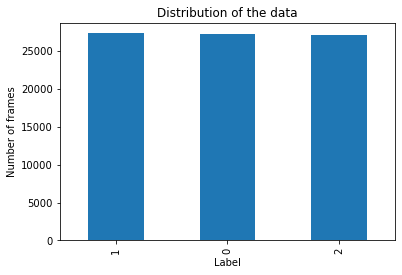

In [1389]:
df_all['Type'].value_counts().plot.bar()
plt.title('Distribution of the data')
plt.xlabel('Label')
plt.ylabel('Number of frames')
plt.show()


In [1390]:
y = df_all["Type"]
X = df_all.drop(labels = ["Type"], axis = 1)

In [1391]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42)

In [1401]:
rf = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=100)
pipeline_rf = make_pipeline(StandardScaler(),rf)
pipeline_rf.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_rf.score(X_test, y_test))        

Model Accuracy: 1.000


In [1402]:
print("My final mean score: " + str((rf.score(X_testdata,y_testdata)*100).round(2))+ "%")

My final mean score: 88.38%


In [1393]:
knn =  KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
pipeline_knn  = make_pipeline(StandardScaler(),knn )
pipeline_knn.fit(X_train, y_train)
print('Model Accuracy: %.3f' % pipeline_knn .score(X_test, y_test))   

Model Accuracy: 0.998


In [1399]:
print("My final mean score: " + str((knn.score(X_testdata,y_testdata)*100).round(2))+ "%")

My final mean score: 88.65%


In [1394]:
print(cross_val_score(pipeline_knn, X, y, cv=10, scoring='accuracy').mean())

0.916447455653078


'40'

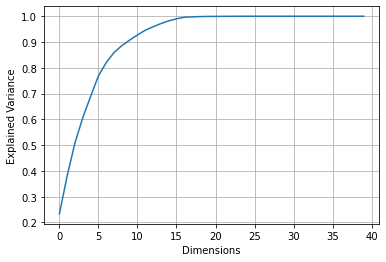

In [1396]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.plot(cumsum)
str(pca.n_components_)

it semmes that 16 Dimensions will be good for us

In [1397]:
rf = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=100)
pipeline_rf2 = make_pipeline(StandardScaler(),PCA(16),rf)
print(cross_val_score(pipeline_rf2, X, y, cv=5, scoring='accuracy').mean())


0.8725844679042656


In [ ]:
tree_param_grid = [
    
    {
     'n_estimators': [100,150,200,250],
     'max_depth':[None,30,50,100],
     'max_features': ['auto','sqrt','log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2,3,5,7],
     'criterion' :['gini', 'entropy']  
        
    }
    
]

In [ ]:
rfc = RandomForestClassifier()
gridTree = RandomizedSearchCV(rf, param_distributions=tree_param_grid,scoring='accuracy', return_train_score=True, n_jobs=-1, cv=5, verbose=3, random_state=21,n_iter=50)

In [ ]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=16),rfc)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))